In [1]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .master("local[*]") \
    .appName("PySparkShell") \
    .getOrCreate()

In [3]:
from pyspark.sql import functions as F
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.sql import functions as sf

In [4]:
import pandas as pd

In [5]:
import plotly.graph_objects as go

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
import seaborn as sns

In [8]:
Countries = spark.read.csv('covid19',inferSchema=True, header=True)
Countries=Countries.orderBy("date", ascending=False)

In [9]:
Countries.createOrReplaceTempView("Countries")
Countries=spark\
.sql(\
     "SELECT  total_cases_per_million \
     FROM Countries \
     Where date='2020-04-27'")
Countries=Countries.orderBy("total_cases_per_million", ascending=False)
=

DataFrame[total_cases_per_million: double]

In [11]:

Countries = Countries.selectExpr("cast(total_cases_per_million as int) total_cases_per_million")

In [14]:
Countries=Countries.na.drop()
Countries.show()

+-----------------------+
|total_cases_per_million|
+-----------------------+
|                  15852|
|                  11124|
|                   9577|
|                   5947|
|                   5251|
|                   4510|
|                   4185|
|                   3980|
|                   3900|
|                   3826|
|                   3732|
|                   3622|
|                   3570|
|                   3348|
|                   3269|
|                   2918|
|                   2395|
|                   2340|
|                   2328|
|                   2251|
+-----------------------+
only showing top 20 rows



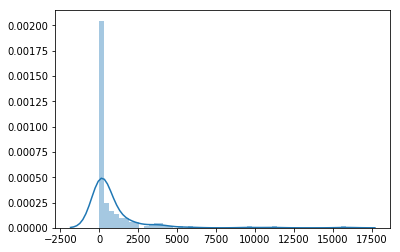

In [15]:
sns.distplot(Countries.toPandas())